[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/me-manu/gammaALPs/blob/master/docs/tutorials/cta_spectrum_simulation_ngc1275.ipynb)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
from astropy import constants as c
from scipy.integrate import simpson


# Simulating NGC 1275 with and without axion-like particles

First we will simulate photon-survival probabilities for the propagation from NGC1275 inside the Perseus cluster towards Earch. Secondly, we will simulate a CTA observation of NGC1275 without ALPs and fit this simulation with our ALP modified spectra.

## Prerequisites

- installed `gammapy`, version 1.0.1, see https://docs.gammapy.org/1.0/index.html
- installed `gammaALPs` version 0.3, see https://gammaalps.readthedocs.io/en/latest/ (will also be done below)
- CTA IRFs available. We will use the CTA North IRFs for 20 degree zenith observation with backgrounds optimized for 5 hour observations. The IRFs are available here: https://zenodo.org/record/5499840#.YUya5WYzbUI

## Further information

This hands-on sesssion roughly follows the tutorials given here:
- https://docs.gammapy.org/1.0/tutorials/analysis-1d/spectrum_simulation.html
- https://docs.gammapy.org/1.0/tutorials/analysis-1d/spectral_analysis.html
- https://gammaalps.readthedocs.io/en/latest/tutorials/mixing_ICM_Gaussian_Turbulence.html


### Installing `gammapy` from within notebook

If you haven't installed gammapy yet, you can run the following command. If you are working in your machine and not on google colab, I strongly advice that you set up a new conda environment and not simply run `pip`. 

In [3]:
pip install gammapy==1.0.1

Note: you may need to restart the kernel to use updated packages.


### Downloading CTA IRFs

If you haven't downloaded the IRFs yet, you can simply run the command below in google colab. 

In [65]:
!wget https://zenodo.org/record/5499840/files/cta-prod5-zenodo-fitsonly-v0.1.zip

--2023-08-22 00:33:36--  https://zenodo.org/record/5499840/files/cta-prod5-zenodo-fitsonly-v0.1.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44065624 (42M) [application/octet-stream]
Saving to: ‘cta-prod5-zenodo-fitsonly-v0.1.zip’

cta-prod5-zenodo-fi 100%[===================>]  42,02M   110KB/s    in 6m 33s  

2023-08-22 00:40:11 (110 KB/s) - ‘cta-prod5-zenodo-fitsonly-v0.1.zip’ saved [44065624/44065624]



Then you can unzip the package:

In [71]:
!unzip cta-prod5-zenodo-fitsonly-v0.1.zip

Archive:  cta-prod5-zenodo-fitsonly-v0.1.zip
  inflating: LICENSE                 
  inflating: README.md               
  inflating: Website.md              
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha-EffectiveArea-DirectionCuts.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha-EffectiveArea-NoDirectionCuts.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha-Layout.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha-ShortTermSensitivity.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha50h-AngularResolution-OtherInstruments.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha50h-DifferentialSensitivity-DifferentObservationTime.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha50h-DifferentialSensitivity-OtherInstruments.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-Alpha50h-OffAxisRelativeSensitivity.png  
  inflating: figures/CTA-Performance-prod5-v0.1-North-NorthSout

And look at the contents:

In [72]:
!ls fits/

CTA-Performance-prod5-v0.1-North-20deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-40deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-60deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-LSTSubArray-20deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-LSTSubArray-40deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-LSTSubArray-60deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-MSTSubArray-20deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-MSTSubArray-40deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-North-MSTSubArray-60deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-20deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-40deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-60deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-MSTSubArray-20deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-MSTSubArray-40deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-MSTSubArray-60deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-SSTSubArray-20deg.FITS.tar.gz
CTA-Performance-prod5-v0.1-South-SSTSubArray-40deg.FITS.tar.gz
C

We will work with the CTA North IRFs for 20 degree zenith observations. So we have to untar the corresponding file:

In [69]:
!tar -xzvf fits/CTA-Performance-prod5-v0.1-North-20deg.FITS.tar.gz

Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits.gz
Prod5-North-20deg-NorthAz-4LSTs09MSTs.180000s-v0.1.fits.gz
Prod5-North-20deg-SouthAz-4LSTs09MSTs.180000s-v0.1.fits.gz
Prod5-North-20deg-AverageAz-4LSTs09MSTs.18000s-v0.1.fits.gz
Prod5-North-20deg-NorthAz-4LSTs09MSTs.18000s-v0.1.fits.gz
Prod5-North-20deg-SouthAz-4LSTs09MSTs.18000s-v0.1.fits.gz
Prod5-North-20deg-AverageAz-4LSTs09MSTs.1800s-v0.1.fits.gz
Prod5-North-20deg-NorthAz-4LSTs09MSTs.1800s-v0.1.fits.gz
Prod5-North-20deg-SouthAz-4LSTs09MSTs.1800s-v0.1.fits.gz


In [73]:
!tar -xzvf fits/CTA-Performance-prod5-v0.1-South-20deg.FITS.tar.gz

Prod5-South-20deg-AverageAz-14MSTs37SSTs.180000s-v0.1.fits.gz
Prod5-South-20deg-NorthAz-14MSTs37SSTs.180000s-v0.1.fits.gz
Prod5-South-20deg-SouthAz-14MSTs37SSTs.180000s-v0.1.fits.gz
Prod5-South-20deg-AverageAz-14MSTs37SSTs.18000s-v0.1.fits.gz
Prod5-South-20deg-NorthAz-14MSTs37SSTs.18000s-v0.1.fits.gz
Prod5-South-20deg-SouthAz-14MSTs37SSTs.18000s-v0.1.fits.gz
Prod5-South-20deg-AverageAz-14MSTs37SSTs.1800s-v0.1.fits.gz
Prod5-South-20deg-NorthAz-14MSTs37SSTs.1800s-v0.1.fits.gz
Prod5-South-20deg-SouthAz-14MSTs37SSTs.1800s-v0.1.fits.gz


In [ ]:
!ls

## Installing `gammaALPs`

We assume that `gammapy` version 1.0.1 is already installed and this notebook runs with the corresponding kernel. If not already installed, the `gammaALPs` package can be installed with the following command.

In [13]:
!pip install gammaALPs==0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01


## Calculating the photon survival probabilities

First, we calculate the survival probabilities $P_{\gamma\to\gamma}$ for mixing inside the Perseus cluster and in the magnetic field of the milky way. We will also include absorption by the EBL. The modelling of the cluster magnetic field follows Ajello et al. (2016) (https://arxiv.org/abs/1603.06978) where the $B$ field is modelled as a field with Gaussian turbulence. 

First, we need some imports from `gammaALPs`:

In [14]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
from ebltable.tau_from_model import OptDepth

And initialize an ALP object, which stores the ALP mass $m_a$ (in neV) and the coupling $g_{a\gamma}$ (in $10^{-11}\mathrm{GeV}^{-1}$).

In [15]:
m, g = 1.,1.
alp = ALP(m,g)

Next, we set the source properties (redshift and sky coordinates) in the ```Source``` container. These can be taken form your favorite catalot for extragalactic objects, e.g., <a href="http://ned.ipac.caltech.edu/">NED</a>.

In [16]:
ngc1275 = Source(z=0.017559, ra='03h19m48.1s', dec='+41d30m42s')
print (ngc1275.z)
print (ngc1275.ra, ngc1275.dec)
print (ngc1275.l, ngc1275.b)

0.017559
49.950416666666655 41.51166666666666
150.57567432060083 -13.26134354429635


### Init the module list

Next, we can initialize the list of transfer modules that will store the different magnetic field environments. 
First, we provide the energies for which we would like to compute the conversion probability

In [17]:
EGeV = np.logspace(1.5, 4.5, 150)

pin = np.diag((1.,1.,0.)) * 0.5Now initialize the initial photon polarization. Since we are dealing with a gamma-ray source, no ALPs are initially present in the beam (third diagonal element is zero). The polarization density matrix is normalized such that its trace is equal to one, $\mathrm{Tr}(\rho_\mathrm{in}) = 1$.

In [18]:
pin = np.diag((1.,1.,0.)) * 0.5

The module list is initialized with our choices for the ALP, our source, the initial polarization, and the energies at which we compute the photon-ALP mixingm

In [19]:
ml = ModuleList(alp, ngc1275, pin = pin, EGeV = EGeV)

Now, we add the different environments to the module list. For the EBL, we will use the model from [Dominguez et al. (2011)](https://ui.adsabs.harvard.edu/abs/2011MNRAS.410.2556D/abstract). The other parameters are the same in [Ajello et al. 2016](https://arxiv.org/abs/1603.06978). 

In [20]:
ml.add_propagation("ICMGaussTurb", 
                  0, # position of module counted from the source. 
                  nsim=100, # number of random B-field realizations
                  B0=10.,  # rms of B field in muG
                  n0=3.9e-2,  # normalization of electron density in cm-3
                  n2=4.05e-3, # second normalization of electron density, see Churazov et al. 2003, Eq. 4 on cm-3
                  r_abell=500., # extension of the cluster in kpc
                  r_core=80.,   # electron density parameter, see Churazov et al. 2003, Eq. 4 in kpc
                  r_core2=280., # electron density parameter, see Churazov et al. 2003, Eq. 4 in kpc
                  beta=1.2,  # electron density parameter, see Churazov et al. 2003, Eq. 4
                  beta2=0.58, # electron density parameter, see Churazov et al. 2003, Eq. 4
                  eta=0.5, # scaling of B-field with electron denstiy
                  kL=0.18, # maximum turbulence scale in kpc^-1, taken from A2199 cool-core cluster, see Vacca et al. 2012 
                  kH=9.,  # minimum turbulence scale, taken from A2199 cool-core cluster, see Vacca et al. 2012
                  q=-2.80, # turbulence spectral index, taken from A2199 cool-core cluster, see Vacca et al. 2012
                  seed=0 # random seed for reproducability, set to None for random seed.
                 )
ml.add_propagation("EBL",1, eblmodel='dominguez') # EBL attenuation comes second, after beam has left cluster
ml.add_propagation("GMF",2, model='jansson12') # finally, the beam enters the Milky Way Field

environs.py: 431 --- INFO: Using inputted chi
environs.py:1196 --- INFO: Using inputted chi


List the module names:

In [21]:
print(ml.modules.keys())

['MixICMGaussTurb', 'OptDepth', 'MixGMF']


We can also inspect the magnetic-field realization and electron density along the line of sight. The magnetic-field realizations are stored in `ml.modules["ICMGaussTurb"].Bn`,

In [22]:
print (ml.modules["ICMGaussTurb"].Bn.shape)

(100, 4499)


And multiplying the magnetic field with the $\psi$ angles stored in `ml.modules["ICMGaussTurb"].Psin` will give us the two components transversal to the propagation direction:

Text(0.5, 0, '$r$ (kpc)')

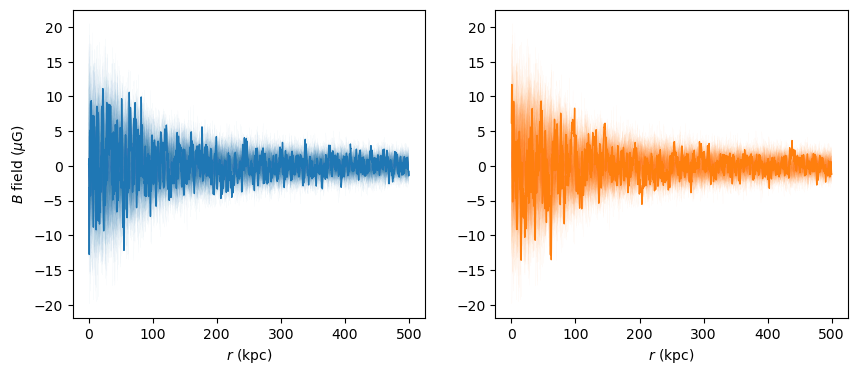

In [23]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for i, B in enumerate(ml.modules["ICMGaussTurb"].Bn):
    ax1.plot(ml.modules["ICMGaussTurb"].r,
             B * np.sin(ml.modules["ICMGaussTurb"].psin[i]),
             lw=1 if not i else 0.1,
             alpha=1 if not i else 0.1,
             color=plt.cm.tab10(0.)
            )
    ax2.plot(ml.modules["ICMGaussTurb"].r,
             B * np.cos(ml.modules["ICMGaussTurb"].psin[i]),
             lw=1 if not i else 0.1,
             alpha=1 if not i else 0.1,
             color=plt.cm.tab10(0.1)
            ) 
    
ax1.set_ylabel('$B$ field ($\mu$G)')
ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')

The coherent magnetic field in the Milky Way used in the mixing can be plotted in a similar way. Note that we're using the attributes `ml.modules["GMF"].B` and `ml.modules["GMF"].psi` since we are dealing with one coherent magnetic field and not many random realizations. 

Text(0.5, 0, '$r$ (kpc)')

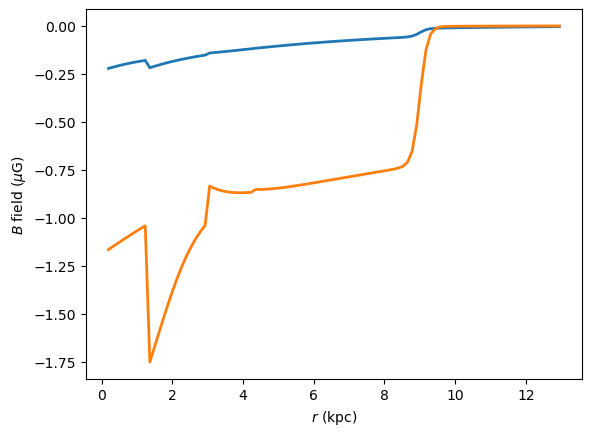

In [24]:
plt.plot(ml.modules["GMF"].r, ml.modules["GMF"].B * np.sin(ml.modules["GMF"].psi),
         lw=2)
plt.plot(ml.modules["GMF"].r, ml.modules["GMF"].B * np.cos(ml.modules["GMF"].psi),
         lw=2) 
plt.ylabel('$B$ field ($\mu$G)')
plt.xlabel('$r$ (kpc)')

The electron density in our Perseus cluster model looks like this (and comes from [Churazov et al., 2003](https://ui.adsabs.harvard.edu/abs/2003ApJ...590..225C/abstract))

Text(0.5, 0, '$r$ (kpc)')

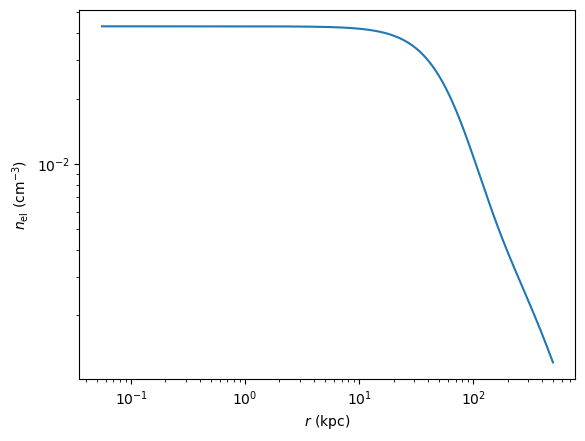

In [25]:
plt.loglog(ml.modules["ICMGaussTurb"].r, ml.modules["ICMGaussTurb"].nel)
plt.ylabel('$n_\mathrm{el}$ (cm$^{-3}$)')
plt.xlabel('$r$ (kpc)')

### Spatial correlation and coherence length

The `gammaALPs.bfields.Bgaussian` class has methods to calculate the spatial correlation of the magnetic field and the rotation measure. We can access these methods through the the magnetic field model mehtod, which we can access through `ml.modules['ICMGaussTurb'].Bfield_model`. 

The spatial correlation $C(x_3) = \langle B_\perp(\vec{x}) B_\perp(\vec{x} + x_3 \vec{e}_3)\rangle$ of the transversal magnetic field along the line of sight $z$ is computed like this:

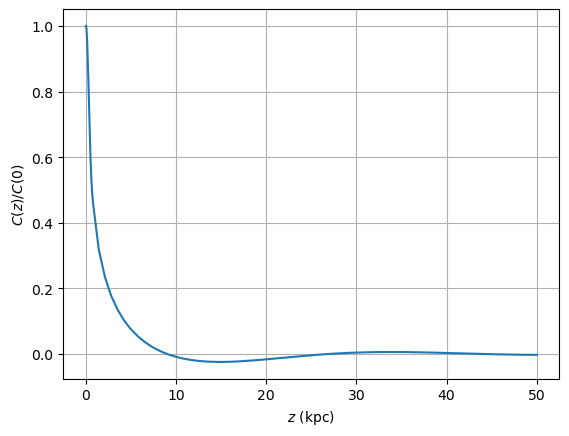

In [26]:
x3 = np.linspace(0.,50.,1000)  # distance in kpc from cluster center
c = ml.modules["ICMGaussTurb"].Bfield_model.spatial_correlation(x3) 

plt.plot(x3, c / c[0])
plt.xlabel("$z$ (kpc)")
plt.ylabel("$C(z) / C(0)$")
plt.grid(True)

This is turn can be used to calculate the coherence length of the field, 
$$ \Lambda_C = \frac{1}{C(0)} \int\limits_0^\infty C(z)dz. $$


In [27]:
z = np.linspace(0.,1e3,1000)  # distance in kpc from cluster center
c = ml.modules["ICMGaussTurb"].Bfield_model.spatial_correlation(z) 

Lambda_c = simpson(c, z) / c[0]

print ("Coherence length of the field is Lambda_C = {0:.3e} kpc".format(Lambda_c))

Coherence length of the field is Lambda_C = 1.402e+00 kpc


### Run all modules

Now we run the modules. 

The ```px, py, pa``` variables contain the mixing probability into the two photon polarization states ($x$, $y$) and into the axion state ($a$). If this is taking too much time, consider reducing the number of energies and / or the number of simulated $B$-field realizations. On my laptop, 100 realizations at 150 energies take around 30s. On google colab, it took around 2 minutes.

We can also change the ALP parameters before running the modules:

In [28]:
ml.alp.m = 30.
ml.alp.g = 0.5

In [29]:
%%time
px, py, pa = ml.run()

   core.py: 652 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixICMGaussTurb'>
   core.py: 652 --- INFO: Running Module 2: <class 'gammaALPs.base.environs.MixGMF'>


CPU times: user 1min 3s, sys: 40.5 s, total: 1min 43s
Wall time: 1min 43s


### Plot the output 

We now plot the resulting total survival probability, $P_{\gamma\gamma} = P_x + P_y$ for each 
magnetic-field realization.

(0.1, 1.1)

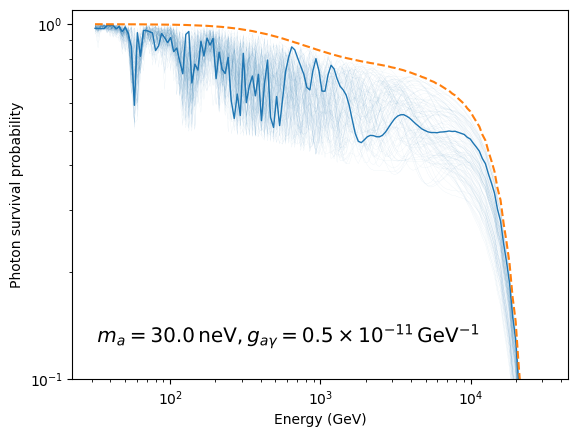

In [30]:
pgg = px + py # the total photon survival probability

effect = dict(path_effects=[withStroke(foreground="w", linewidth=2)])

for i, p in enumerate(pgg):  # plot all realizations
    plt.loglog(ml.EGeV, p, color="C0",
               alpha=1 if not i else 0.2,
               lw=1 if not i else 0.1)
    
# plot the EBL case only
atten = np.exp(-ml.modules['OptDepth'].opt_depth(ml.source.z, ml.EGeV / 1e3))
plt.loglog(ml.EGeV, atten, ls='--', color="C1")


plt.xlabel('Energy (GeV)')
plt.ylabel('Photon survival probability')

plt.annotate(r'$m_a = {0:.1f}\,\mathrm{{neV}}, g_{{a\gamma}}'
             r' = {1:.1f} \times 10^{{-11}}\,\mathrm{{GeV}}^{{-1}}$'.format(ml.alp.m, ml.alp.g),
             xy=(0.05,0.1), 
             size ='x-large',
             xycoords='axes fraction',
             **effect)

plt.ylim(1e-1, 1.1)

### Questions:

- how does $P_{\gamma\to\gamma}$ change for different ALP masses / couplings? You may want to change one parameter at a time and simulate this for less B-field realizations. 
- how does the $B$-field correlation length and $P_{\gamma\to\gamma}$ change for different $k_{L/H}$ and power-law index $q$ and rms field strength $B$?

## `Gammapy` simulations

Now that we have our theoretical predictions for the photon propagation with ALPs (stored in the `pgg` array) and without ALPs (EBL only case stored in the `atten` array), we can setup and run the `gammapy` simulation.

First we need some additional imports. 

In [31]:
import astropy.units as u
from astropy.coordinates import Angle, SkyCoord
from regions import CircleSkyRegion
import operator

And more imports from `gammapy`:

In [32]:
from gammapy.data import Observation, observatory_locations
from gammapy.datasets import SpectrumDataset, SpectrumDatasetOnOff
from gammapy.irf import load_cta_irfs
from gammapy.makers import SpectrumDatasetMaker
from gammapy.maps import MapAxis, RegionGeom
from gammapy.modeling import Fit
from gammapy.modeling import models 
from gammapy.estimators import FluxPointsEstimator

## Simulation of a single spectrum

To do a simulation, we need to define the observational parameters like
the livetime, the offset, the assumed integration radius, the energy
range to perform the simulation for and the choice of spectral model. We
then use an in-memory observation which is convolved with the IRFs to
get the predicted number of counts. This is Poission fluctuated using
the `fake()` to get the simulated counts for each observation.




In [33]:
# Define simulation parameters parameters
livetime = 5. * u.h

pointing = SkyCoord(ml.source.ra, ml.source.dec, unit="deg", frame="fk5")
offset = 0.5 * u.deg

# Reconstructed and true energy axis
energy_axis = MapAxis.from_edges(
    np.logspace(-1, 1.5, 26), unit="TeV", name="energy", interp="log"
)

energy_axis_true = MapAxis.from_edges(
    np.logspace(-1.5, 2.0, 71), unit="TeV", name="energy_true", interp="log"
)

on_region_radius = Angle("0.11 deg")

center = pointing.directional_offset_by(position_angle=0 * u.deg, separation=offset)
on_region = CircleSkyRegion(center=center, radius=on_region_radius)

Now we define the intrinsic source model. This is taken from the VERITAS observation of NGC1275 during a flaring episode. During the observation, the source could be described with a power law with exponential cutoff, 

$$ \phi(E) = N_0 \left(\frac{E}{E_0}\right)^{-\Gamma}\exp\left(-\frac{E}{E_\mathrm{cut}}\right) $$

with $N_0 = 1.54\times10^{-9}\mathrm{cm}^{-2}\,\mathrm{s}^{-1}\,\mathrm{TeV}^{-1}$, $\Gamma = 2.11$, $E_\mathrm{cut} = 0.54\,$TeV, and $E_0 = 0.3\,$TeV.

Go to the available spectral models here: https://docs.gammapy.org/1.0/user-guide/model-gallery/index.html 
and implement the correct spectrum. Note that the `gammapy` implementation uses $\lambda = E_\mathrm{cut}^{-1}$ for the fitting. Also note that the parameters need to set with the correct units (using the `astropy` implementation). 


In [34]:
model_intrinsic = models.ExpCutoffPowerLawSpectralModel(
    index=2.11,
    amplitude=1.54e-9 * u.Unit("cm-2 s-1 TeV-1"),
    lambda_=1. / 0.54 / u.TeV,
    reference=0.3 * u.TeV,
)
print(model_intrinsic)

ExpCutoffPowerLawSpectralModel

  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral     index 2.1100e+00                ... nan  False   False     
spectral amplitude 1.5400e-09 cm-2 s-1 TeV-1 ... nan  False    True     
spectral reference 3.0000e-01            TeV ... nan   True   False     
spectral   lambda_ 1.8519e+00          TeV-1 ... nan  False   False     
spectral     alpha 1.0000e+00                ... nan   True   False     


With the intrinsic model, we now build a compound model, which multiplies the intrinsic model with a template model that includes the EBL absorption. 

In [35]:
# EBL absorption template
ebl_absorption = models.TemplateSpectralModel(ml.EGeV * u.GeV, atten)

# Compound model
model_input = models.CompoundSpectralModel(model_intrinsic, ebl_absorption, operator=operator.mul)
print(model_input)

# and the Skymodel
model_no_alps = models.SkyModel(spectral_model=model_intrinsic, name="ngc1275")

CompoundSpectralModel
    Component 1 : ExpCutoffPowerLawSpectralModel

  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral     index 2.1100e+00                ... nan  False   False     
spectral amplitude 1.5400e-09 cm-2 s-1 TeV-1 ... nan  False    True     
spectral reference 3.0000e-01            TeV ... nan   True   False     
spectral   lambda_ 1.8519e+00          TeV-1 ... nan  False   False     
spectral     alpha 1.0000e+00                ... nan   True   False     
    Component 2 : TemplateSpectralModel

  type   name   value    unit   error   min max frozen is_norm link
-------- ---- ---------- ---- --------- --- --- ------ ------- ----
spectral norm 1.0000e+00      0.000e+00 nan nan   True    True     
    Operator : mul



Let's plot the intrinsic and observed models:

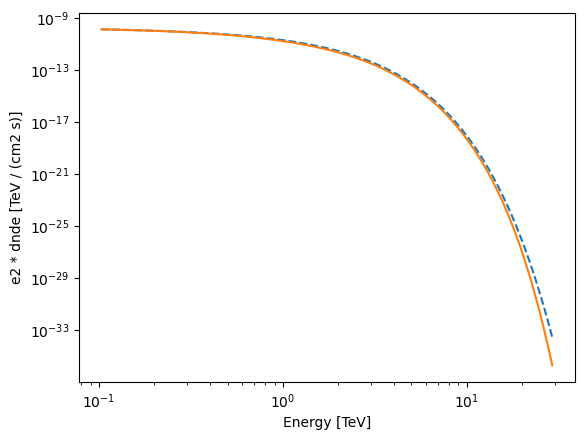

In [37]:
ax = model_intrinsic.plot(energy_bounds=[0.1, 30.] * u.TeV, energy_power=2, ls='--')
_ = model_input.plot(energy_bounds=[0.1, 30.] * u.TeV, energy_power=2)

We see that the EBL absorption is almost negligible due to the small value of the redshift. 

### Load the instrumental response function

You should have downloaded and unpacked the CTA response functions, which are available here: https://zenodo.org/record/5499840


In the cell below, you need to set the correct path with the IRF for 20 deg zenith and 5 hours observation time. 

In [38]:
irfs = load_cta_irfs(
    "./Prod5-North-20deg-AverageAz-4LSTs09MSTs.18000s-v0.1.fits.gz"
)

location = observatory_locations["cta_north"]
obs = Observation.create(
    pointing=pointing,
    livetime=livetime,
    irfs=irfs,
    location=location,
)
print(obs)

Observation

	obs id            : 0 
 	tstart            : 51544.00
	tstop             : 51544.21
	duration          : 18000.00 s
	pointing (icrs)   : 50.0 deg, 41.5 deg

	deadtime fraction : 0.0%



#### Peek at the IRFs

We check the effective area, PSF, and energy dispersion matrix.

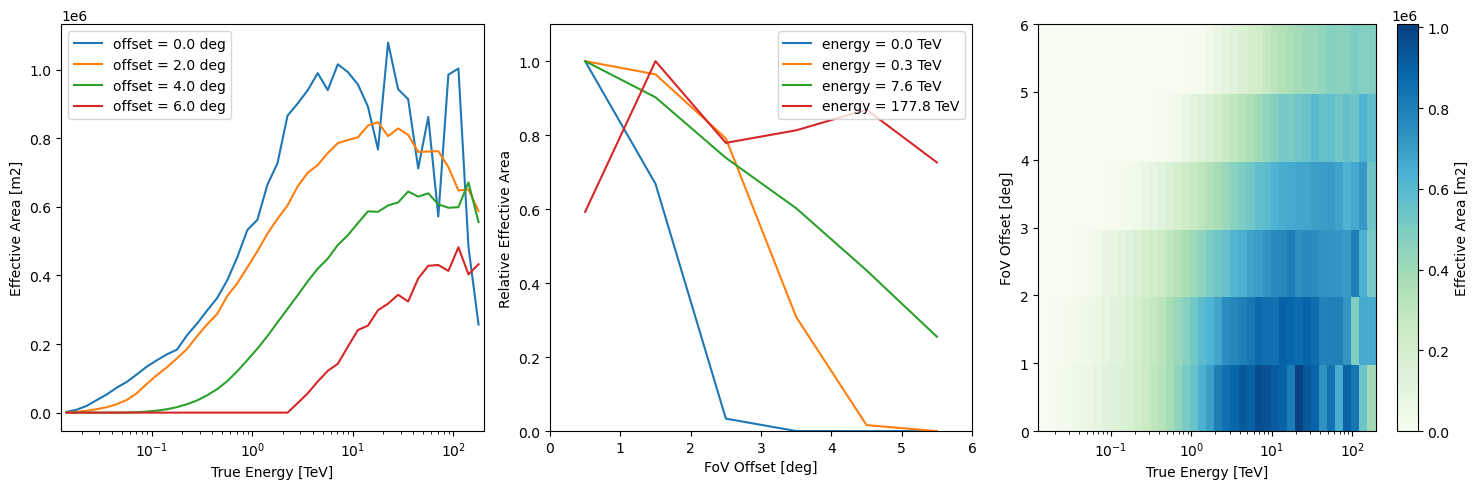

In [39]:
irfs["aeff"].peek()

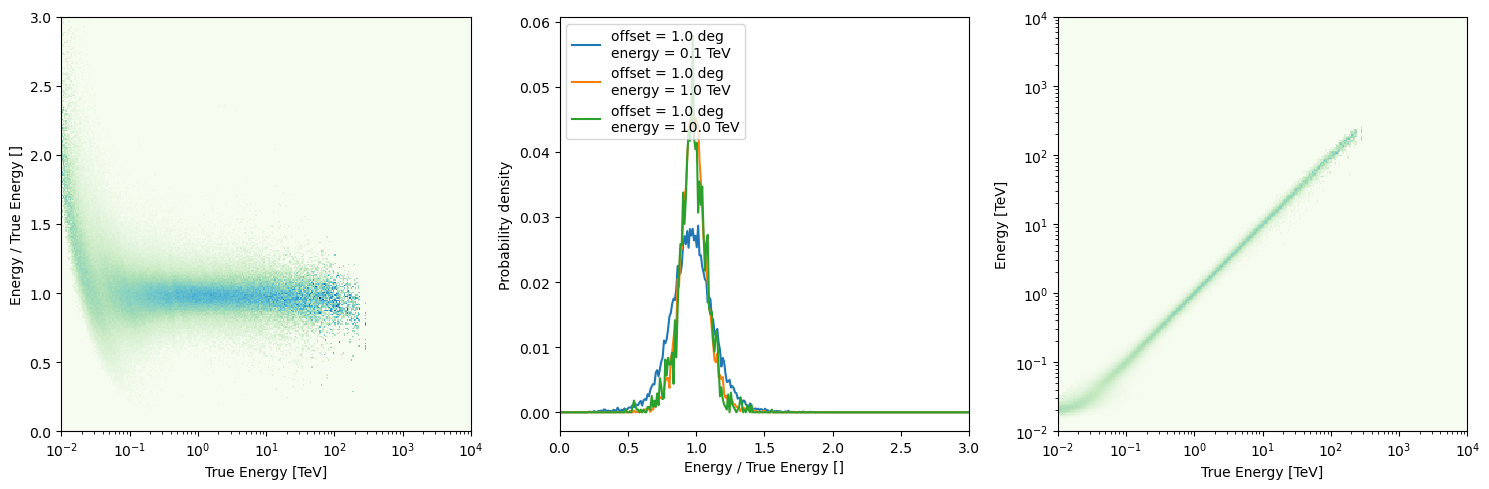

In [40]:
irfs["edisp"].peek()

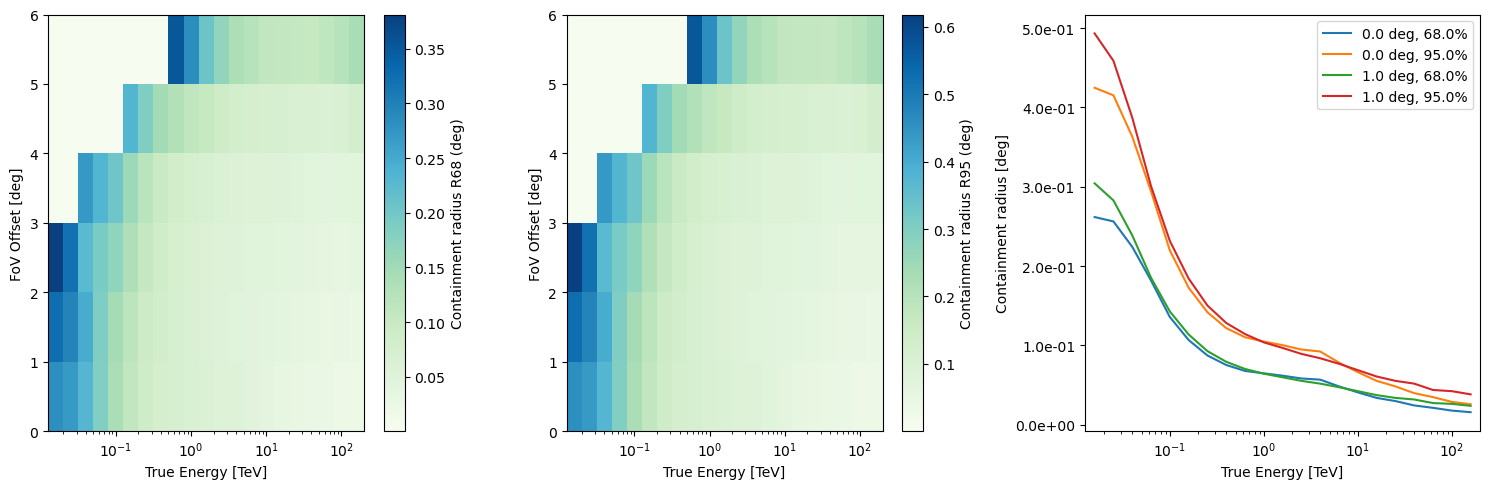

In [41]:
irfs["psf"].peek()

### Simulate a spectra

Now we have to follow some steps to simulate the On/Off data set.


In [42]:
# Make the SpectrumDataset
geom = RegionGeom.create(region=on_region, axes=[energy_axis])

dataset_empty = SpectrumDataset.create(
    geom=geom, energy_axis_true=energy_axis_true, name="obs-0"
)
maker = SpectrumDatasetMaker(selection=["exposure", "edisp", "background"])

dataset = maker.run(dataset_empty, obs)

# Set the model on the dataset, and fake
dataset.models = model_no_alps
dataset.fake(random_state=42)
print(dataset)

SpectrumDataset
---------------

  Name                            : obs-0 

  Total counts                    : 30540 
  Total background counts         : 593.00
  Total excess counts             : 29947.00

  Predicted counts                : 30615.95
  Predicted background counts     : 593.00
  Predicted excess counts         : 30022.95

  Exposure min                    : 7.39e+08 m2 s
  Exposure max                    : 1.78e+10 m2 s

  Number of total bins            : 25 
  Number of fit bins              : 25 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : -436976.53

  Number of models                : 1 
  Number of parameters            : 5
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : ngc1275
    Datasets names            : None
    Spectral model type       : ExpCutoffPowerLawSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      index          

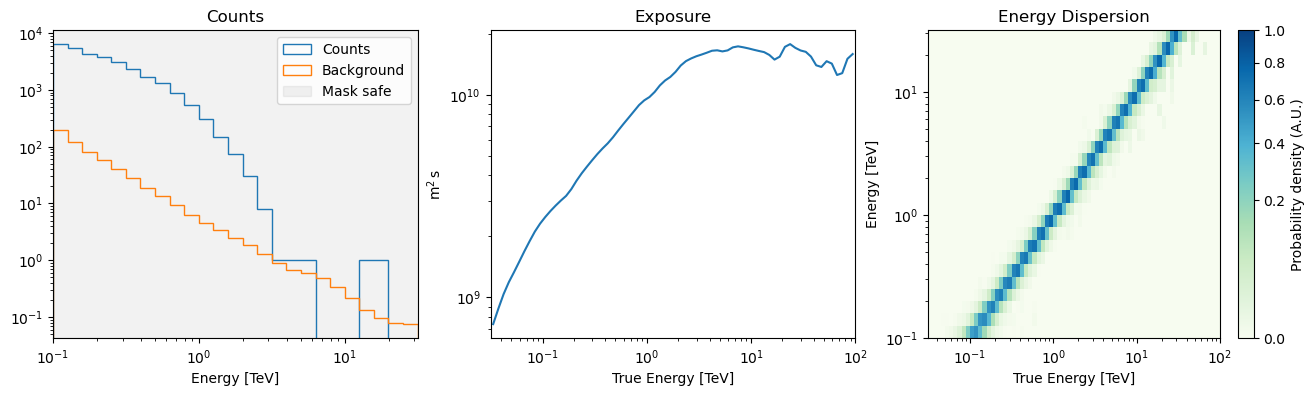

In [43]:
dataset.peek()

You can see that background counts are now simulated.

### On-Off analysis

To do an on off spectral analysis, which is the usual science case, the
standard would be to use `SpectrumDatasetOnOff`, which uses the
acceptance to fake off-counts.
The `acceptance_off` is essentially the parameter $\alpha^{-1}$. 

In [44]:
dataset_on_off = SpectrumDatasetOnOff.from_spectrum_dataset(
    dataset=dataset, acceptance=1, acceptance_off=5
)
dataset_on_off.fake(npred_background=dataset.npred_background(), random_state=42)
print(dataset_on_off)

SpectrumDatasetOnOff
--------------------

  Name                            : 7AbTR4xh 

  Total counts                    : 30396 
  Total background counts         : 603.60
  Total excess counts             : 29792.40

  Predicted counts                : 30626.10
  Predicted background counts     : 603.15
  Predicted excess counts         : 30022.95

  Exposure min                    : 7.39e+08 m2 s
  Exposure max                    : 1.78e+10 m2 s

  Number of total bins            : 25 
  Number of fit bins              : 25 

  Fit statistic type              : wstat
  Fit statistic value (-2 log(L)) : 20.13

  Number of models                : 1 
  Number of parameters            : 5
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : ngc1275
    Datasets names            : None
    Spectral model type       : ExpCutoffPowerLawSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      index 

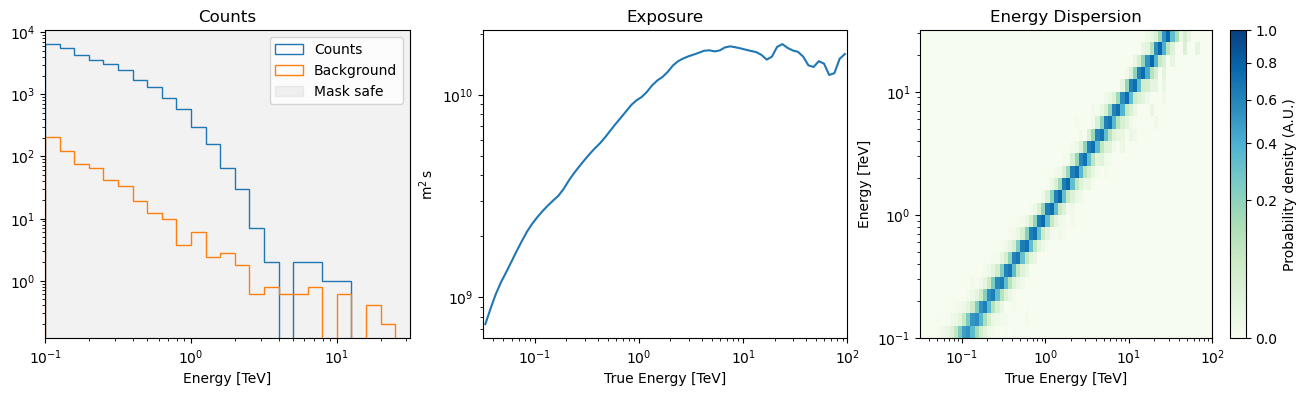

In [45]:
dataset_on_off.peek()

### Look at the statistics of the dataset

Basic statistics of the dataset like On, Off, excess counds, and the source significance are available from the `info_dict`.

In [46]:
dataset_on_off.info_dict()

{'name': '7AbTR4xh',
 'counts': 30396,
 'excess': 29792.4,
 'sqrt_ts': 299.5955309323119,
 'background': 603.6,
 'npred': 30626.095756242292,
 'npred_background': 603.1475235791222,
 'npred_signal': 30022.94823266317,
 'exposure_min': <Quantity 7.38565891e+08 m2 s>,
 'exposure_max': <Quantity 1.77686207e+10 m2 s>,
 'livetime': <Quantity 18000. s>,
 'ontime': <Quantity 18000. s>,
 'counts_rate': <Quantity 1.68866667 1 / s>,
 'background_rate': <Quantity 0.03353333 1 / s>,
 'excess_rate': <Quantity 1.65513333 1 / s>,
 'n_bins': 25,
 'n_fit_bins': 25,
 'stat_type': 'wstat',
 'stat_sum': 20.134724028435816,
 'counts_off': 3018,
 'acceptance': 25.0,
 'acceptance_off': 125.0,
 'alpha': 0.2}

### Perform the fit

For our baseline model, without ALPs, we fit the observation with the same model that we used to simulate the data set, i.e., our intrinsic model with EBL absorption. 

In [47]:
help(Fit)

Help on class Fit in module gammapy.modeling.fit:

class Fit(builtins.object)
 |  Fit(backend='minuit', optimize_opts=None, covariance_opts=None, confidence_opts=None, store_trace=False)
 |  
 |  Fit class.
 |  
 |  The fit class provides a uniform interface to multiple fitting backends.
 |  Currently available: "minuit", "sherpa" and "scipy"
 |  
 |  Parameters
 |  ----------
 |  backend : {"minuit", "scipy" "sherpa"}
 |      Global backend used for fitting, default : minuit
 |  optimize_opts : dict
 |      Keyword arguments passed to the optimizer. For the `"minuit"` backend
 |      see https://iminuit.readthedocs.io/en/stable/reference.html#iminuit.Minuit
 |      for a detailed description of the available options. If there is an entry
 |      'migrad_opts', those options will be passed to `iminuit.Minuit.migrad()`.
 |  
 |      For the `"sherpa"` backend you can from the options:
 |  
 |          * `"simplex"`
 |          * `"levmar"`
 |          * `"moncar"`
 |          * `"gridse

In [48]:
# init the fit
fit = Fit(optimize_opts={"print_level":2})

In [49]:
%%time
result_no_alps = fit.run(dataset_on_off)

I MnSeedGenerator Initial state: FCN =       20.13472403 Edm =       3.503161523 NCalls =     13
I VariableMetricBuilder Start iterating until Edm is < 0.0002 with call limit = 545
I VariableMetricBuilder    0 - FCN =       20.13472403 Edm =       3.503161523 NCalls =     13
I VariableMetricBuilder    1 - FCN =       18.22027225 Edm =    0.007400339116 NCalls =     27
I VariableMetricBuilder    2 - FCN =       18.21362221 Edm =   0.0001154889848 NCalls =     35
I VariableMetricBuilder    3 - FCN =       18.20904095 Edm =   3.163885904e-05 NCalls =     45
I VariableMetricBuilder After Hessian
I VariableMetricBuilder    4 - FCN =       18.20904095 Edm =   3.206837671e-05 NCalls =     61
CPU times: user 208 ms, sys: 10.9 ms, total: 219 ms
Wall time: 258 ms


In [50]:
# check the best-fit parameters
result_no_alps.models[0].spectral_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,2.1072e+00,,2.437e-02,nan,nan,False,False,
spectral,amplitude,1.5361e-09,cm-2 s-1 TeV-1,3.917e-11,nan,nan,False,True,
spectral,reference,3.0000e-01,TeV,0.000e+00,nan,nan,True,False,
spectral,lambda_,1.8682e+00,TeV-1,6.444e-02,nan,nan,False,False,
spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,False,


The Cash statistic, $C = -2\ln\mathcal{L}$, is stored in `results_no_alps.total_stat`:

In [51]:
result_no_alps.total_stat

18.209040954244458

One can easily plot the excess counts and the predicted signal counts:

<AxesSubplot: xlabel='Energy [TeV]', ylabel='$\\mathrm{}$'>

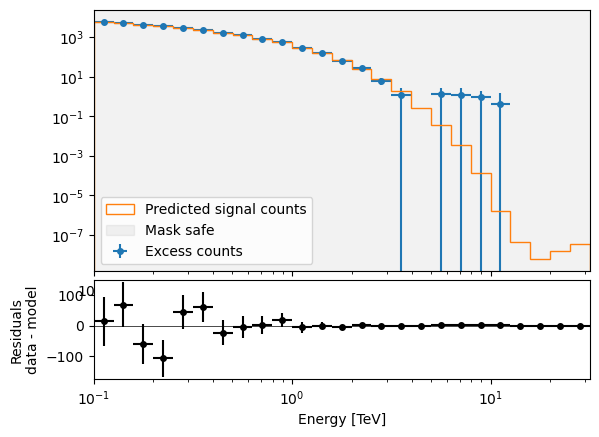

In [52]:
plt.figure()
ax_spectrum, ax_residuals = dataset_on_off.plot_fit()
dataset_on_off.plot_masks(ax=ax_spectrum)

Before performing the fit with ALPs, we generate flux points, so that we can plot the SED.

In [53]:
fpe = FluxPointsEstimator(
    energy_edges=energy_axis.edges, reoptimize=False, selection_optional=["errn-errp", "ul"], source="ngc1275"
)
flux_points = fpe.run(datasets=dataset_on_off)

Plot the flux points, define the energy range to flux points with a $\mathrm{TS}$ values larger than 1

(<Quantity 0.09 TeV>, <Quantity 10. TeV>)


(0.09000000000000002, 10.000000000000002)

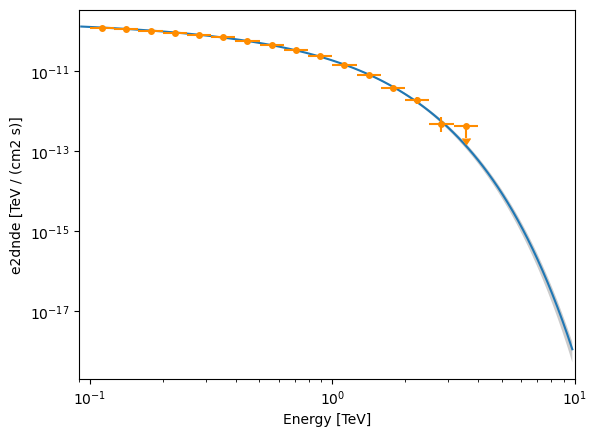

In [54]:
# TS values of flux points
ts_values = np.squeeze(flux_points.ts.data)

# mask 
mask_ts = ts_values > 1.

# energy range for plotting
plot_range = flux_points.energy_axis.edges[:-1][mask_ts][0] * 0.9, flux_points.energy_axis.edges[1:][mask_ts][-1]
print(plot_range)

# plot the model
ax = result_no_alps.models[0].spectral_model.plot(energy_bounds=plot_range, energy_power=2, ls="-")

# plot the butterfly, i.e., the model error
result_no_alps.models[0].spectral_model.plot_error(energy_bounds=plot_range, energy_power=2, ax=ax)

# plot the flux points
flux_points.plot(ax=ax, sed_type="e2dnde", color="darkorange")

# limit the energy range
plt.xlim(plot_range)

## Fit with Axion-like particles 

As a last step, we perform a fit with axion-like particles. For that, we loop through the 
$B$ field realizations. We first fit and plot one example. Then we perform the loop.

First we define a new compound model that includes the ALP effect. 

In [55]:
# use the first B field realization
alps = models.TemplateSpectralModel(ml.EGeV * u.GeV, pgg[0])

# and define the compound model
model_obs_with_alps = models.CompoundSpectralModel(model_intrinsic, alps, operator=operator.mul)

model_w_alps = models.SkyModel(spectral_model=model_obs_with_alps, name="ngc1275")

Let's plot the different models

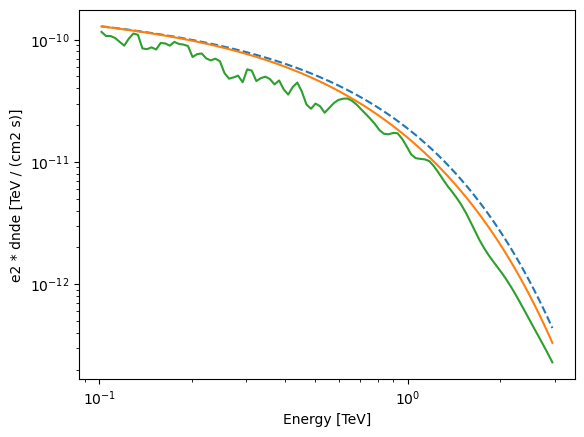

In [56]:
ax = model_intrinsic.plot(energy_bounds=[0.1, 3.] * u.TeV, energy_power=2, ls='--')
_ = model_input.plot(energy_bounds=[0.1, 3.] * u.TeV, energy_power=2)
_ = model_obs_with_alps.plot(energy_bounds=[0.1, 3.] * u.TeV, energy_power=2)

Then we set the model and fit it to data

In [57]:
dataset_on_off.models = model_w_alps

In [58]:
result_w_alps = fit.run(dataset_on_off)

I MnSeedGenerator Initial state: FCN =       2265.662062 Edm =       3686.155128 NCalls =     13
I VariableMetricBuilder Start iterating until Edm is < 0.0002 with call limit = 545
I VariableMetricBuilder    0 - FCN =       2265.662062 Edm =       3686.155128 NCalls =     13
I VariableMetricBuilder    1 - FCN =       299.5749847 Edm =       13.44688779 NCalls =     21
I VariableMetricBuilder    2 - FCN =       286.9162341 Edm =       8.997116972 NCalls =     29
I VariableMetricBuilder    3 - FCN =       210.0410549 Edm =       55.89171435 NCalls =     41
I VariableMetricBuilder    4 - FCN =        127.438934 Edm =       1.876232958 NCalls =     50
I VariableMetricBuilder    5 - FCN =       124.0268169 Edm =      0.4508037129 NCalls =     58
I VariableMetricBuilder    6 - FCN =       123.0575075 Edm =     0.03568119919 NCalls =     66
I VariableMetricBuilder    7 - FCN =       123.0268865 Edm =    0.000435578281 NCalls =     74
I VariableMetricBuilder    8 - FCN =       123.0264129 Edm 

In [59]:
# check the best-fit parameters
result_w_alps.models[0].spectral_model.parameters.to_table()

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,1.8340e+00,,2.669e-02,nan,nan,False,False,
spectral,amplitude,2.4411e-09,cm-2 s-1 TeV-1,6.955e-11,nan,nan,False,True,
spectral,reference,3.0000e-01,TeV,0.000e+00,nan,nan,True,False,
spectral,lambda_,2.2504e+00,TeV-1,7.297e-02,nan,nan,False,False,
spectral,alpha,1.0000e+00,,0.000e+00,nan,nan,True,False,
spectral,norm,1.0000e+00,,0.000e+00,nan,nan,True,True,


In [60]:
result_w_alps.total_stat

123.0264128871945

#### Questions:
- What do you notice for the best-fit parameters?
- Can you plot the flux points, the best fit without ALPs and the best-fit models with ALPs?

(0.09000000000000002, 10.000000000000002)

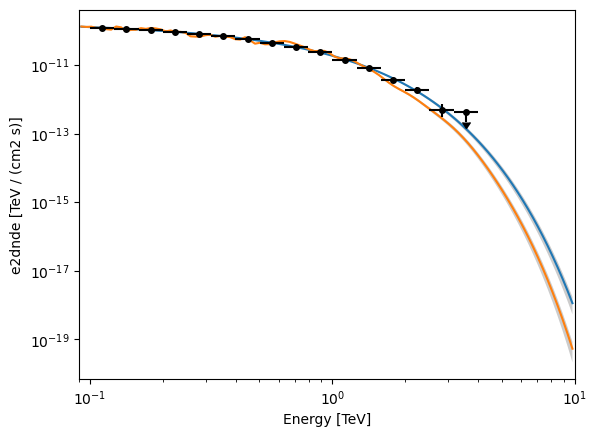

In [61]:
# plot the model w/o ALPs
ax = result_no_alps.models[0].spectral_model.plot(energy_bounds=plot_range, energy_power=2, ls="-")
result_no_alps.models[0].spectral_model.plot_error(energy_bounds=plot_range, energy_power=2, ax=ax)

# plot the model w/ ALPs
ax = result_w_alps.models[0].spectral_model.plot(energy_bounds=plot_range, energy_power=2, ls="-")
result_w_alps.models[0].spectral_model.plot_error(energy_bounds=plot_range, energy_power=2, ax=ax)

# plot the flux points
flux_points.plot(ax=ax, sed_type="e2dnde", color="k")

# limit the energy range
plt.xlim(plot_range)

Lastly, we loop through the magnetic field realizations and perform the fit in each step. 
We save the $C$ stat value and plot the difference, $\Delta C = C_\mathrm{w/~ALP} - C_\mathrm{no~ALP}$.

In [62]:
%%time

tot_stat = []

fit = Fit(optimize_opts={"print_level":1})  # reduce print level

for i, p in enumerate(pgg):
    
    # model
    alps = models.TemplateSpectralModel(ml.EGeV * u.GeV, pgg[i])
    model_obs_with_alps = models.CompoundSpectralModel(model_intrinsic, alps, operator=operator.mul)
    model_w_alps = models.SkyModel(spectral_model=model_obs_with_alps, name="ngc1275")
    
    # set the model of the dataset
    dataset_on_off.models = model_w_alps
    
    # fit 
    result_w_alps = fit.run(dataset_on_off)
    
    # save the total stat value
    tot_stat.append(result_w_alps.total_stat)

CPU times: user 27.8 s, sys: 0 ns, total: 27.8 s
Wall time: 27.8 s


In [63]:
# convert to np.array
tot_stat = np.array(tot_stat)

5
26.788341414536625


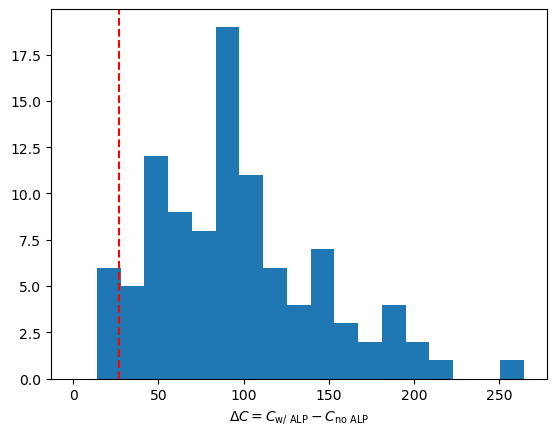

In [64]:
# plot the histogram
llr = tot_stat - result_no_alps.total_stat  # the log likelihood ratio values
bins = np.linspace(0, llr.max(), 20)  # bin edges for histogram
plt.hist(llr, bins=bins)
plt.xlabel("$\Delta C = C_\mathrm{w/~ALP} - C_\mathrm{no~ALP}$")

# and the fifth quantile
print(int(len(tot_stat) * 0.05))
tot_stat_q5 = np.sort(tot_stat)[int(len(tot_stat) * 0.05)]

plt.axvline(tot_stat_q5 - result_no_alps.total_stat, ls='--', color='r')
print(tot_stat_q5 - result_no_alps.total_stat)

### Questions:
- How do interpret this histogram?
- Which B field realization should we use to decide if the ALP hypothesis is preferred or not?
- How do the results change when you change the observation live time?
- How do the results change when you change the intrinsic model to a power law?
- How do the results change when you change the ALP mass or photon-ALP coupling?